# Topic - Autistic Spectrum Disorder Screening for Children  

Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

## Dataset Description:
Dataset name: Autistic Spectrum Disorder Screening Data for Children<br>
Source: https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++<br>
Note: The dataset contains screening data for 292 patients.

### Attribute Information:
Age: Number<br> 
Gender: String<br> 
Ethnicity: String<br>
Born with jaundice: Boolean (yes or no)<br>
Family member with PDD: Boolean (yes or no)<br>
Who is completing the test: String<br>
Country of residence: String<br>
Used the screening app before: Boolean (yes or no)<br>
10 Questions: The answer code (0, 1) of the question based on the screening method used<br>
Screening Score: Integer<br> 

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import keras

print('Keras version = ', keras.__version__)

Using TensorFlow backend.


Keras version =  2.3.1


## Reading and Understanding Data

In [2]:
data = pd.read_csv('autism_data.csv')
data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [3]:
print('Number of rows = ',data.shape[0])
print('Number of columns = ',data.shape[1])

Number of rows =  292
Number of columns =  22


In [4]:
data.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

## Data preparation & Exploratory data analysis

In [5]:
data.isnull().sum().sort_values(ascending=False)

Class/ASD          0
relation           0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
id                 0
dtype: int64

In [6]:
# result is a total of a1_score + .. + a10_score, we already have that information so we will drop the result column 
data = data.drop(['id','result', 'age_desc'], axis=1)

### Whether the case was born with jaundice?

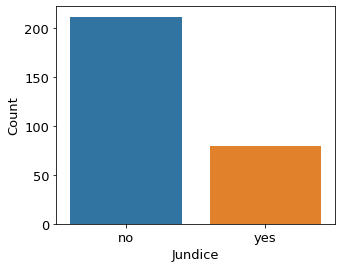

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='jundice',data = data)
plt.xlabel('Jundice',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.tick_params(labelsize=13);

### Common Ethnicities

In [8]:
data['ethnicity'].unique()

array(['Others', 'Middle Eastern ', '?', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [9]:
data['ethnicity'].replace(['?'], ['Others'], inplace  = True)

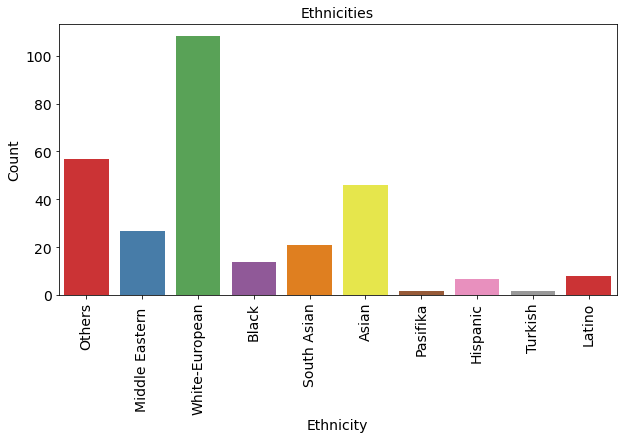

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='ethnicity',data = data,palette='Set1')
plt.xlabel('Ethnicity',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Ethnicities',fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(labelsize=14)

### Whether any immediate family member has a PDD?

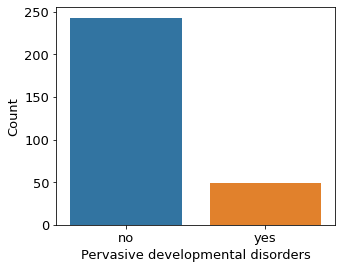

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='austim',data = data)
plt.xlabel('Pervasive developmental disorders',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.tick_params(labelsize=13);

### Country of residence

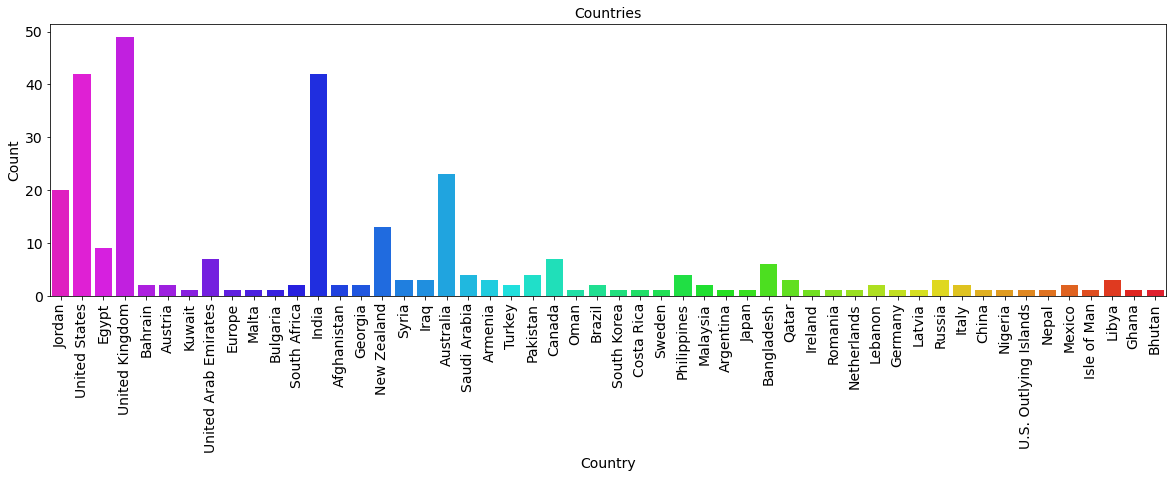

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(x='contry_of_res',data = data,palette='gist_rainbow_r')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Countries',fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(labelsize=14)

### Whether the user has used the screening app before?

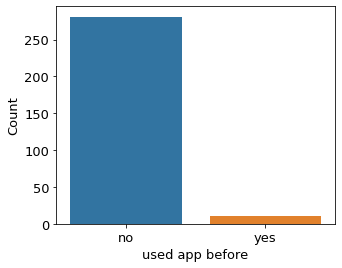

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='used_app_before',data = data)
plt.xlabel('used app before',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.tick_params(labelsize=13);

In [14]:
data['relation'].unique()

array(['Parent', '?', 'Self', 'Relative', 'Health care professional',
       'self'], dtype=object)

In [15]:
data['relation'].replace(['?', 'self'], ['Others', 'Self'], inplace  = True)

## Model Building

In [16]:
x = data.drop(['Class/ASD'], axis = 1)
X = pd.get_dummies(x)

In [17]:
y = data['Class/ASD']
Y = pd.get_dummies(y)

In [18]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(233, 94)
(59, 94)
(233, 2)
(59, 2)


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential()

model.add(Dense(8, input_dim=94, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 760       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________


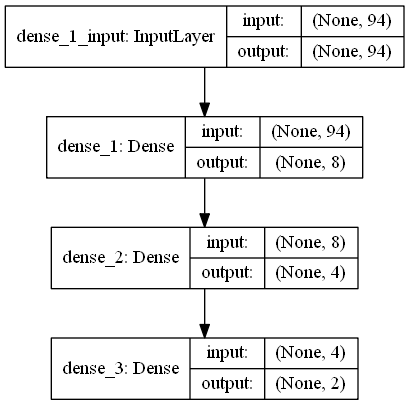

In [22]:
# visualizing the model
from keras.utils import plot_model
plot_model(model, show_shapes=True)

### Model Training

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=Y_train, epochs=30, validation_data=(X_test,Y_test),callbacks=[early_stop])

Train on 233 samples, validate on 59 samples
Epoch 1/30
233/233 [==============================] - 0s 529us/step - loss: 0.6934 - accuracy: 0.4807 - val_loss: 0.6933 - val_accuracy: 0.4407
Epoch 2/30
233/233 [==============================] - 0s 59us/step - loss: 0.6922 - accuracy: 0.6094 - val_loss: 0.6928 - val_accuracy: 0.5254
Epoch 3/30
233/233 [==============================] - 0s 60us/step - loss: 0.6915 - accuracy: 0.6695 - val_loss: 0.6924 - val_accuracy: 0.5932
Epoch 4/30
233/233 [==============================] - 0s 43us/step - loss: 0.6904 - accuracy: 0.7296 - val_loss: 0.6919 - val_accuracy: 0.6102
Epoch 5/30
233/233 [==============================] - 0s 54us/step - loss: 0.6887 - accuracy: 0.7425 - val_loss: 0.6910 - val_accuracy: 0.5593
Epoch 6/30
233/233 [==============================] - 0s 47us/step - loss: 0.6863 - accuracy: 0.7425 - val_loss: 0.6882 - val_accuracy: 0.6780
Epoch 7/30
233/233 [==============================] - 0s 54us/step - loss: 0.6829 - accuracy: 0.

In [24]:
result = pd.DataFrame(model.history.history)
print('Toatal number of epochs run = ', result.shape[0])

Toatal number of epochs run =  30


## Evaluating the Model

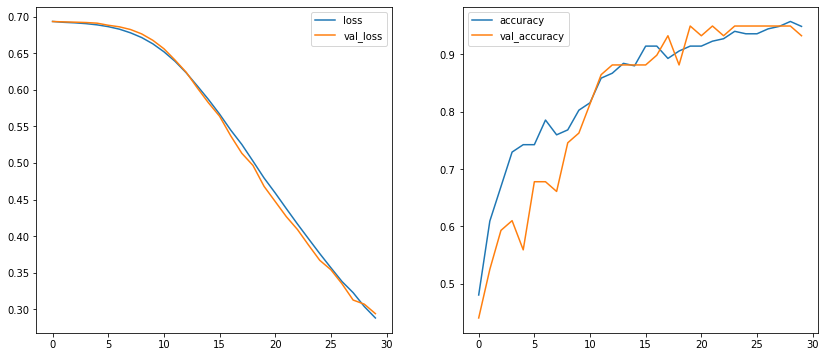

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))

ax1.plot(model.history.history['loss'], label='loss')
ax1.plot(model.history.history['val_loss'], label='val_loss')
ax1.legend()

ax2.plot(model.history.history['accuracy'], label='accuracy')
ax2.plot(model.history.history['val_accuracy'], label='val_accuracy')
ax2.legend();

In [26]:
test_acc = model.evaluate(X_test, Y_test)
print("\nAccuracy on test data = ", round(test_acc[1],3)*100,'%')

59/59 [==============================] - 0s 33us/step

Accuracy on test data =  93.2 %


In [27]:
predictions = model.predict_classes(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test[['YES']], predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.85      1.00      0.92        22

    accuracy                           0.93        59
   macro avg       0.92      0.95      0.93        59
weighted avg       0.94      0.93      0.93        59

